<img src="https://d1u5p3l4wpay3k.cloudfront.net/lolesports_gamepedia_en/thumb/5/5b/Worlds_2018.png/1200px-Worlds_2018.png" />
<h1 style="text-align:center"> Analyzing League of Legends Champions and Match Statistics   </h1>
<h6 style="text-align:center"> Calvin Holman | Daniel Briggs | Christina Tobin </h6>


<h3>Introduction</h3>

League of Legends (LoL) is a multi-player, fast-paced, and competitive online game that blends the speed and intensity of an RTS (Real-Time Strategy) with RPG (Role Playing Game) elements. Two teams of powerful champions, each with a unique design and playstyle, battle head-to-head across multiple battlefields and game modes. League was developed and published by Riot Games for Microsoft Windows and macOS in 2009. The last player statistics released by the company in 2016 showed League has 100 million active players each month. Outside companies estimate this number has continued to rise over the last 2 years. In League of Legends, players assume the role of a "summoner" who controls a "champion" with unique abilities. They battle against a team of other players or computer-controlled champions. The goal is usually to destroy the opposing team's "nexus", a structure that lies at the heart of a base protected by defensive structures, although other distinct game modes exist as well. Each League of Legends match has all champions starting off fairly weak but increasing in strength by accumulating items and experience.

Besides serving as an online game for hobbyists, League of Legends has a developed competitive scene. In North America and Europe, Riot Games organizes the League Championship Series (LCS), located in Los Angeles and Berlin respectively, which consists of 10 professional teams from each continent. Similar regional competitions exist in China (LPL), South Korea (LCK), Taiwan/Hong Kong/Macau (LMS), and various other regions. These regional competitions culminate with the annual World Championship. The 2018 Mid-Season Invitational had an overall peak concurrent viewership of 19.8 million, while the finals had an average concurrent viewership of 11 million along with a multi-million dollar prize pool. 

Given the widespread interest in League and its professional tournament, our tutorial objective is to use player statistics from the 6 regions that made it to worlds, to predict the world championship team. This data from [Gamepedia ](https://lol.gamepedia.com/League_of_Legends_Esports_Wiki), is from the most recent season, 2018 summer season. In order to accurately predict the winning team, we will begin by looking at champion data to see if we can accurately predict a champions win rate and ban rate with various champion statistics, like the Kills Deaths Assists (KDA) ratio and GoldShare (how much of the team's gold this champions averages per game). We will also look at the players by position to decide if a single role has more influence over a team's win. This can be broken down into what variables, such a Kills, Deaths, and Assists or GoldShare, have helped teams wins in the regular season. We will apply that to a heuristic that assigns coefficents, or weighs reflecting importance, to those variables. Using linear regression, our heuristic will be able to predict the winner of the league chanpionship. 

In doing this analysis, we hope to spark interest in new players and provide exciting new information for existing ones. For both types of players, the tutorial should offer insight into the important factors of games and how to win. For more information on the game, see [here.](https://na.leagueoflegends.com/en/game-info/get-started/) 

<h3> Getting Started with the Data </h3>

The code for this will be in Python 3, making use of the available libraries such as [numPY](http://www.numpy.org/), [Pandas](https://pandas.pydata.org/), [bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), [sklearn](https://scikit-learn.org/stable/), and [statsmodel](https://www.statsmodels.org/stable/index.html).

In [1]:
!pip install statsmodels
!pip install scipy
!pip install lxml
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

from itertools import chain
from itertools import combinations

from sklearn import linear_model
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<h3>Obtaining the Data</h3>

The data, pulled from [Gamepedia](https://lol.gamepedia.com/League_of_Legends_Esports_Wiki), is obtained through GET requests and stored in variables r1 through r14. Most of the requests are for the regular season data for each region. When the data was originally read in, the information was saved into csv files. Since the start of our work, the website changed their data encoding so we will use the csv files to access the information. However, we have kept in the steps used to procure the data originally.

In [2]:
# GET requests for all of the different datasets we will need. These are broken into 2 brackets as the large number of requests 
#will seem like an attack if they all go through at once. 

# Gather tournament data on all 90 players
r = requests.get("https://lol.gamepedia.com/2018_Season_World_Championship/Main_Event/Player_Statistics")

# Regular season data from North America
r2 = requests.get("https://lol.gamepedia.com/NA_LCS/2018_Season/Summer_Season/Player_Statistics")

# Regular Season data from EU
r3 = requests.get("https://lol.gamepedia.com/EU_LCS/2018_Season/Summer_Season/Player_Statistics")

# Regular Season data from the LPL
r4 = requests.get("https://lol.gamepedia.com/LPL/2018_Season/Summer_Season/Player_Statistics")

# Regular Season data from the LCK
r5 = requests.get("https://lol.gamepedia.com/LCK/2018_Season/Summer_Season/Player_Statistics")

# Regular Season data from the LMS
r6 = requests.get("https://lol.gamepedia.com/LMS/2018_Season/Summer_Season/Player_Statistics")

# Regular Season data from the VCS
r7 = requests.get("https://lol.gamepedia.com/VCS/2018_Season/Summer_Season/Player_Statistics")

# Champion data from play-ins
r8 = requests.get("https://lol.gamepedia.com/2018_Season_World_Championship/Main_Event/Champion_Statistics")

In [3]:
# Match data from North America
r9 = requests.get("https://lol.gamepedia.com/NA_LCS/2018_Season/Summer_Season")

# Match data from Europe
r10 = requests.get("https://lol.gamepedia.com/EU_LCS/2018_Season/Summer_Season")

# Regular Season data from the LPL
r11 = requests.get("https://lol.gamepedia.com/LPL/2018_Season/Summer_Season")

# Regular Season data from the LCK
r12 = requests.get("https://lol.gamepedia.com/LCK/2018_Season/Summer_Season")

# Regular Season data from the LMS
r13 = requests.get("https://lol.gamepedia.com/LMS/2018_Season/Summer_Season")

# Regular Season data from the VCS
r14 = requests.get("https://lol.gamepedia.com/VCS/2018_Season/Summer_Season")

<h3>Data Tidying and Modification</h3>

Now that all our data is read in and stored, we want to parse through it to get each team's data. Due to the way the website provides the information, several parsers are needed depending on the page. Data parsing and tidying, given the large amount of data needed and the numerous steps to modify and tidy it in the dataframes, is a significant part of our project. Tidied data will make the linear regression portion of our project much easier, so we spent a lot of time prepping the data. 


The first thing we looked at was the match data. We went through, getting the team's data, inserting NaN, a variable for non existant values, in place of empty or missing data slots, and disgarding unnecessary rows before we stored the information in a final dataframe called 'matchReg.'

Keep in mind that these steps may not work as the website continues to change their encoding and format over time.

In [4]:
ls = []  # This will store the parsed BeautifulSoup object for each region in a list
matchReg = [] # This list will store the final results of our data collection for each region
j = 0

# Parse with lxml
ls.append(BeautifulSoup(r9.text, "lxml"))
ls.append(BeautifulSoup(r10.text, "lxml"))
ls.append(BeautifulSoup(r11.text, "lxml"))
ls.append(BeautifulSoup(r12.text, "lxml"))
ls.append(BeautifulSoup(r13.text, "lxml"))
ls.append(BeautifulSoup(r14.text, "lxml"))

# Number of teams for each region
numTeams = [10,10,7,10,8,8]

# Go through each Region's BeautifulSoup parsing
for bs in ls:
    
    # Note: Since each region's data is stored on a separate webpage, it isn't stored the same way and the
    #       parsing rules are different depending on the region. This is why we have a variable, j, that helps
    #       us keep track of what region we're on by acting as an iteration counter.
    
    # Parsing the LPL data
    if j==2:

        # Turn the beautiful soup object into a string, and find the beginning of the table. Since we're doing a 
        # string split, we cut off the first element, which is the data before the table
        l = str(bs).split("title=\"Points\"")[1:]

        arr = []  # final array for the dataframe

        # Loop for east and west region
        for t in range(0,2):
            # Find the beginning of each row
            l[t] = l[t].split("title=\"")[1:]

            l2 = []     # Remove unnecessary rows
            l2 = [s for s in l[t] if "std.png" not in s]
            l[t] = l2

            # Split on the </div> tag to get the data for each row
            l[t][numTeams[2]-1] = l[t][numTeams[2]-1].split("</div>")[0]

            # Get each team's data
            for x in range(0,numTeams[2]):
                l[t][x] = l[t][x].split("align=\"center")
                l2 = []
                l2.append(l[t][x][0].split("\">")[0])

                # Different parsing rules for each region
                if (t==2):
                    l2.append(l[t][x][5][2:9])
                else:
                    l2.append(l[t][x][3][2:9])

                # add to our final array
                arr.append(l2)

        # Create the dataframe from our array, and append it to the matchReg list
        matchReg.append(pd.DataFrame(np.array(arr).reshape(len(arr),2), columns = ['Team', 'Record']))
    
    # EU_LCS Data
    elif j==1:
        
        # Turn the beautiful soup object into a string and split at the beginning and end of the
        # the table to give us exactly what we need
        l = str(bs).split("Overall")[1].split("</tbody>")[0].split("</th></tr>")[1:-1]
        
        # Split for each team in the region
        for h in range(0,len(l)):
            l[h] = l[h].split("style=\"background-color:")
            
            # Team name  
            l[h][0] = l[h][0].split("title=")[1].split("\"><img alt")[0][1:]
            
            # Get match data
            for g in range(1,numTeams[j]+1):
                tmpStr = l[h][g][6:] 
                
                # Some of the columns have dummy values, so if we see one, we replace it with 'blank'
                # which means we know to remove it later on
                tmpStr = 'blank' if tmpStr[0] == 'A' else tmpStr[0:5]
                
                l[h][g] = tmpStr
            
            # Remove the last row
            l[h] = l[h][0:-1]
            
        # Create the column headers for the dataframe
        teams = ["Teams"]
        for t in l:
            teams.append(t[0])
            
        # Create the dataframe and append to our list
        matchReg.append(pd.DataFrame(np.array(l).reshape(len(l),len(l[0])), columns = teams))

        # Replace our spacer values with NaN to standardize it
        matchReg[j] = matchReg[j].replace("blank",np.nan)
        
    # LMS and VCS are parsed the same 
    elif j==4 or j==5:
        
        # Split at the beginning and end of the table to get exactly what we need.
        l = str(bs).split("Overall")[1].split("</tbody>")[0].split("</th></tr>")[1:-1]
        
        # Split for each team
        for h in range(0,len(l)):
            l[h] = l[h].split("style=\"background-color:")
            
            # Team name  
            l[h][0] = l[h][0].split("title=")[1].split("\"><img alt")[0][1:]
            
            l2 = [] # Exclude rows that contain 'display', since they contain dummy values
            l2 = [s for s in l[h] if "display" not in s]
            l[h] = l2
            
            # Get match data
            for g in range(1,numTeams[j]+1):
                tmpStr = l[h][g][6:]
                
                # Put in 'blank' for the rows we don't want to make sure we change them later
                tmpStr = 'blank' if tmpStr[0] == 'A' else tmpStr[1:6]
                
                l[h][g] = tmpStr
            
            # Remove the last row
            l[h] = l[h][0:-1]
        
        # Create the column headers for the dataframe
        teams = ["Teams"]
        for t in l:
            teams.append(t[0])
            
        # Create the dataframe
        matchReg.append(pd.DataFrame(np.array(l).reshape(len(l),len(l[0])), columns = teams))

        # Replace our spacer values with NaN to standardize it
        matchReg[j] = matchReg[j].replace("blank",np.nan)
      
    # Default parser -> Works for NA_LCS and LCK
    else:
        
        # Split at the beginning of the table
        l = str(bs).split("plainlinks crossbox")[1].split("title=")[1:]

        # Get all of the teams
        for x in range(0,numTeams[j]):
            l[x] = l[x][1:]
            l[x] = l[x].split("\"><img alt")[0]

        # Get all team names as the first element
        l[0:numTeams[j]] = [','.join(l[0:numTeams[j]])]
        l[0] = l[0].split(",")

        # Get match data for each team
        for t in range(1,numTeams[0]+1):
            l[t] = l[t].split("<span class=\"crossbox-match-link")[:-1]

            # Get the score for how well each team did
            for x in range(0,len(l[t])):
                l[t][x] = l[t][x][-5:]

            # Insert the team name at the beginning of the row
            l[t].insert(0,l[0][t-1])

        # Cut off unnecessary rows in the array
        l = l[:numTeams[j]+1]

        # Insert spacing because you can't play yourself
        for t in range(1,numTeams[j]+1):
            l[t].insert(t,'blank')
            l[t] = l[t][:numTeams[j]+1]

        # Insert new column
        l[0].insert(0,'Teams')

        # Create the dataframe
        matchReg.append(pd.DataFrame(np.array(l[1:]).reshape(len(l)-1,len(l[0])), columns = l[0]))

        # Replace our spacer values with NaN to standardize it
        matchReg[j] = matchReg[j].replace("blank",np.nan)
    
    j = j+1


IndexError: list index out of range

As stated above, since the website encodings changed, from here we used the csv's we originally stored the data we got with the above steps. The data read in from the CSVs were stored in our 'matchReg' dataframe. To make the information easier to use later in the tutorial by assigning some weight, we set the winner to be either 0 or 100 for each match. We then combined all the regional data in 'matchReg' into a master dataframed called 'masterMatch.'

First let's take a look at what one of the regions looks like now.

In [5]:
# Since we stored the data into csv files, we can just read them in with pandas.
matchReg = []
matchReg.append(pd.read_csv("naMatchdat.csv").drop('Unnamed: 0',axis=1))
matchReg.append(pd.read_csv("EUMatchdat.csv").drop('Unnamed: 0',axis=1))
matchReg.append(pd.read_csv("LPLMatchdat.csv").drop('Unnamed: 0',axis=1))
matchReg.append(pd.read_csv("LCKMatchdat.csv").drop('Unnamed: 0',axis=1))
matchReg.append(pd.read_csv("LMSMatchdat.csv").drop('Unnamed: 0',axis=1))
matchReg.append(pd.read_csv("VCSMatchdat.csv").drop('Unnamed: 0',axis=1))

matchReg[0].head()

,Team 0,Team 1,Winner
0,100_Thieves,Cloud9,0
1,100_Thieves,Cloud9,1
2,100_Thieves,Clutch_Gaming,0
3,100_Thieves,Clutch_Gaming,0
4,100_Thieves,Counter_Logic_Gaming,0


So this dataframe lets us look at a head to head matchup of 2 teams in the same region. Now we will standardize this table to make our lives easier later on when doing linear regression on it.

In [6]:
# To increase the value of our weights for linear regression, we change it to be either 0 or 100.
# We also switch our 'Winner' value to be 100 if team 0 wins, or 0 if team 1 wins.
for row in range(0,len(matchReg)):
    matchReg[row]['Winner'] = matchReg[row]['Winner']*100
    t = matchReg[row].replace(0,5)
    t = t.replace(100,0)
    matchReg[row] = t.replace(5,100)
    
# Combine each region's data into one master dataframe
masterMatch = pd.concat(matchReg).reset_index().drop('index',axis=1)

masterMatch.head()

,Team 0,Team 1,Winner
0,100_Thieves,Cloud9,100
1,100_Thieves,Cloud9,0
2,100_Thieves,Clutch_Gaming,100
3,100_Thieves,Clutch_Gaming,100
4,100_Thieves,Counter_Logic_Gaming,100


We also have to parse the the regular season data for each region, also dropping unnecessary data, and adding it to a dataframe called 'reg'. Then, we tidy the data more by sorting the data in the dataframe by 'Games' and 'Player.' 

In [7]:
# Regular season data for each region
# We also took precautions and decided to save this to a csv file once we combined all of the data together from each region.

ls = []  # Contains all of the beautiful soup objects for each region's data
reg = [] # List of all of the dataframes for each region

# Parse with lxml
ls.append(BeautifulSoup(r2.text, "lxml"))
ls.append(BeautifulSoup(r3.text, "lxml"))
ls.append(BeautifulSoup(r4.text, "lxml"))
ls.append(BeautifulSoup(r5.text, "lxml"))
ls.append(BeautifulSoup(r6.text, "lxml"))
ls.append(BeautifulSoup(r7.text, "lxml"))

j = 0

# Go through each region's data
for bs in ls:
    
    # split to get all the players individually
    players = str(bs).split("std.png/45px")[1:]

    # Go through all of the players
    for rowIndex in range (0,len(players)): 
        
        # Split on each column of the table
        players[rowIndex] = players[rowIndex].split("</td>")

        # Get the player's name
        players[rowIndex][1] = players[rowIndex][1].split("title=\"")[1].split("\"")[0]

        # Get the team name
        players[rowIndex][0] = players[rowIndex][0][1:].split("_std.png")[0][:-4]

        # Get the data for the rest of the columns in the table
        for y in range (2,17): 
            players[rowIndex][y] = players[rowIndex][y].split("center\">")[1].split('\n')[0]
            
        # Removes all of the unnecessary information in the line to get the champions played number
        players[rowIndex][17] = players[rowIndex][17][-18:-16]

    # Convert into data frame and append to our list
    reg.append(pd.DataFrame(np.array(players).reshape(len(players),len(players[0])), columns = ['Team','Player','Games','Wins','Losses','Winrate','Kills','Deaths','Assists','KDA','CS','CSPM','Gold','GPM','Kill Participation','Kill Share','Gold Share','Champions Played','19','20']))

    # Drop unnecessary columns
    reg[j] = reg[j].drop(['19','20'],axis=1)
    
    # Parse what we have to get just the numbers and remove all extraneous characters
    reg[j]['Games'] = reg[j]['Games'].str.extract('(\d+)', expand=False)
    reg[j]['Champions Played'] = reg[j]['Champions Played'].str.extract('(\d+)', expand=False)
    reg[j]['Gold'] = reg[j]['Gold'].str[:-1]
    reg[j]['Gold Share'] = reg[j]['Gold Share'].str[:-1]
    reg[j]['Kill Participation'] = reg[j]['Kill Participation'].str[:-1]
    reg[j]['Kill Share'] = reg[j]['Kill Share'].str[:-1]
        
    j = j+1

# reg contains regular season data by region
# reg[0] --> North America (NA)
# reg[1] --> Europe (EU)
# reg[2] --> China (LPL)
# reg[3] --> Korea (LCK)
# reg[4] --> Taiwan (LMS)
# reg[5] --> Vietnam (VCS)

# Convert data into numeric form for each table
for table in reg: 
    k=0
    for col in table.columns:
        if k>1 and k<18: # Only convert on these specific columns
            table[col] = pd.to_numeric(table[col])
        k=k+1
        
# Sort the tables based on 'Games' and 'Player' to standardize the view
reg[0] = reg[0].sort_values(['Games','Player'],ascending=[False,True])
reg[1] = reg[1].sort_values(['Games','Player'],ascending=[False,True])
reg[2] = reg[2].sort_values(['Games','Player'],ascending=[False,True])
reg[3] = reg[3].sort_values(['Games','Player'],ascending=[False,True])
reg[4] = reg[4].sort_values(['Games','Player'],ascending=[False,True])
reg[5] = reg[5].sort_values(['Games','Player'],ascending=[False,True])

reg[0].head()

,Team,Player,Games,Wins,Losses,Winrate,Kills,Deaths,Assists,KDA,CS,CSPM,Gold,GPM,Kill Participation,Kill Share,Gold Share,Champions Played
6,100_Thieves,Aphromoo,20,12,8,60.0,0.90,2.75,8.45,3.40,46.75,1.26,9.25,249,68.0,6.5,13.6,7
8,Team_SoloMid,Bjergsen,20,11,9,55.0,3.35,1.60,4.00,4.59,336.80,9.34,14.69,407,70.7,32.2,22.4,14
10,100_Thieves,Cody Sun,20,12,8,60.0,4.25,1.80,5.50,5.42,382.20,10.29,16.68,449,70.9,30.9,24.6,8
7,Echo_Fox,Dardoch,20,11,9,55.0,2.40,3.25,6.00,2.58,179.55,5.34,11.29,335,68.9,19.7,18.7,12
5,FlyQuest,Flame,20,10,10,50.0,2.30,2.30,4.50,2.96,290.00,8.86,12.87,393,58.9,19.9,22.5,8


Lastly, because we plan to investigate how a player's position affects the winning heuristic, we needed to assign the data of position to each player. Unfortunately, the data read in didn't track positions, and no single table available had this data, so instead of downloading and pasing 30 separate tables for a single column, we hardcoded in the player's position. The resulting table below shows the player's position in the right-most column.

There are five possible positions: Top, JG (jungler), Mid (Mid-Lane), ADC (Marksman/AD Carry), or Supp (Support). Each position is responsible for doing performing different roles during the game, but you can learn about the role of each position [here.](https://www.lol-smurfs.com/blog/lol-roles-explained/)

In [8]:
pos = ['Supp', 'Mid', 'ADC', 'JG', 'Top', 'JG', 'Top', 'Top', 'Mid',
       'Supp', 'Mid', 'JG', 'Top', 'ADC', 'ADC', 'ADC', 'Supp', 'Supp',
       'JG', 'ADC', 'ADC', 'Mid', 'Mid', 'Top', 'Top', 'Top', 'Supp',
       'Supp', 'Mid', 'Mid', 'Top', 'ADC', 'JG', 'Top', 'JG', 'ADC',
       'Supp', 'Supp', 'JG', 'Mid', 'JG', 'Supp', 'JG', 'Mid', 'Top',
       'Mid', 'Supp', 'ADC', 'ADC', 'ADC', 'JG', 'JG', 'Supp', 'Mid',
       'Mid', 'JG', 'Top', 'ADC', 'Supp', 'Supp', 'Mid', 'JG', 'JG', 'ADC',
       'Supp', 'JG', 'Top']
reg[0]['Position'] = pos

pos1 = ['JG', 'ADC', 'Top', 'ADC', 'Supp', 'JG', 'Mid', 'Mid', 'Mid', 'ADC',
       'Supp', 'Top', 'Supp', 'Top', 'Top', 'Mid', 'Mid', 'JG', 'Mid',
       'JG', 'Mid', 'ADC', 'ADC', 'Supp', 'Supp', 'ADC', 'JG', 'JG', 'JG',
       'Mid', 'Supp', 'Top', 'Top', 'Supp', 'Top', 'Mid', 'Supp', 'Top',
       'ADC', 'Supp', 'Top', 'JG', 'ADC', 'ADC', 'Supp', 'Top', 'Mid',
       'JG', 'JG', 'JG', 'ADC', 'JG', 'ADC', 'ADC', 'Supp', 'Mid']
reg[1]['Position'] = pos1

pos2 = ['JG','ADC','Supp','Mid','Top','JG','Mid','Top','Top','Supp','ADC',
        'Supp','Mid','Supp','Top','ADC','JG','JG','Mid','Supp','Mid','Supp',
        'Top','Mid','ADC','Supp','ADC','Supp','Top','Mid','ADC','Top','ADC',
        'JG','Supp','Top','Supp','Mid','ADC','Supp','Top','Mid','Top','JG',
        'Supp','ADC','JG','Mid','Top','JG','ADC','JG','JG','Supp','Top','ADC',
        'Mid','JG','Top','Mid','JG','ADC','ADC','Mid','ADC','Mid','JG','Supp',
        'Top','JG','Top','Mid','JG','Top','Mid','JG','Top','ADC','ADC','JG',
        'ADC','JG','Mid','JG','Supp','JG','ADC','Mid','Supp','ADC','Top','JG',
        'JG','Top','ADC','Mid','ADC','ADC','JG','Supp','Mid','Supp']
reg[2]['Position'] = pos2

pos3 = ['Top', 'Mid', 'Supp', 'Supp', 'Mid', 'Top', 'Supp', 'ADC', 'JG',
       'Top', 'ADC', 'Supp', 'Mid', 'ADC', 'Top', 'Mid', 'Top', 'Top',
       'ADC', 'Supp', 'Supp', 'Supp', 'ADC', 'Mid', 'Top', 'Mid', 'ADC',
       'Mid', 'Mid', 'Supp', 'Top', 'JG', 'JG', 'ADC', 'JG', 'Top', 'JG',
       'ADC', 'Supp', 'ADC', 'Top', 'Supp', 'JG', 'JG', 'JG', 'ADC', 'Mid',
       'JG', 'JG', 'Mid', 'Mid', 'JG', 'JG', 'ADC', 'JG', 'Supp', 'Mid',
       'JG', 'JG', 'Supp', 'JG', 'ADC', 'ADC', 'JG', 'Mid', 'ADC', 'Supp',
       'Top', 'ADC', 'Top', 'Top']
reg[3]['Position'] = pos3

pos4 = ['Supp', 'Top', 'JG', 'Mid', 'Top', 'Supp', 'ADC', 'Mid', 'ADC',
       'Top', 'JG', 'Supp', 'Supp', 'JG', 'Mid', 'ADC', 'Supp', 'ADC',
       'Supp', 'ADC', 'Mid', 'Top', 'ADC', 'Mid', 'JG', 'Mid', 'Top',
       'ADC', 'Supp', 'Supp', 'Top', 'ADC', 'Top', 'JG', 'Mid', 'Mid',
       'JG', 'JG', 'ADC', 'Top', 'JG', 'Top', 'ADC', 'JG', 'JG', 'Mid',
       'Top', 'JG', 'JG', 'JG', 'Top', 'ADC', 'Top', 'Supp', 'JG', 'Supp',
       'Supp', 'Supp', 'JG', 'JG']
reg[4]['Position'] = pos4

pos5 = ['ADC', 'Mid', 'Supp', 'Top', 'ADC', 'Top', 'JG', 'Mid', 'Supp',
       'ADC', 'JG', 'Top', 'Mid', 'Mid', 'JG', 'Mid', 'ADC', 'Top', 'Supp',
       'Mid', 'Top', 'JG', 'Top', 'ADC', 'Supp', 'ADC', 'JG', 'ADC',
       'Supp', 'JG', 'Supp', 'JG', 'Supp', 'Top', 'Mid', 'ADC', 'ADC',
       'JG', 'Supp', 'Mid', 'Top', 'JG', 'Supp', 'Mid', 'Top', 'Top',
       'Supp', 'Mid', 'JG', 'ADC', 'Supp', 'Supp', 'Supp', 'Mid', 'JG',
       'Supp', 'JG', 'Top', 'JG', 'Mid']
reg[5]['Position'] = pos5

reg[0].head()

,Team,Player,Games,Wins,Losses,Winrate,Kills,Deaths,Assists,KDA,CS,CSPM,Gold,GPM,Kill Participation,Kill Share,Gold Share,Champions Played,Position
6,100_Thieves,Aphromoo,20,12,8,60.0,0.90,2.75,8.45,3.40,46.75,1.26,9.25,249,68.0,6.5,13.6,7,Supp
8,Team_SoloMid,Bjergsen,20,11,9,55.0,3.35,1.60,4.00,4.59,336.80,9.34,14.69,407,70.7,32.2,22.4,14,Mid
10,100_Thieves,Cody Sun,20,12,8,60.0,4.25,1.80,5.50,5.42,382.20,10.29,16.68,449,70.9,30.9,24.6,8,ADC
7,Echo_Fox,Dardoch,20,11,9,55.0,2.40,3.25,6.00,2.58,179.55,5.34,11.29,335,68.9,19.7,18.7,12,JG
5,FlyQuest,Flame,20,10,10,50.0,2.30,2.30,4.50,2.96,290.00,8.86,12.87,393,58.9,19.9,22.5,8,Top


Now that we have all the position data for our players stored, we combine our tables and save it into a csv file so we don't have to parse the data every time.

In [9]:
# Combine regular season player data from each region into a master table
masterReg = pd.concat(reg).sort_values(['Games','Player'],ascending=[False,True]).reset_index().drop('index',axis=1)

# masterReg.to_csv('masterReg.csv')  # Save the data for use later on so we don't have to parse every time.

# Read in the table since we saved it already.
masterReg = pd.read_csv("masterReg.csv").drop("Unnamed: 0",axis=1)

masterReg.head()

,Team,Player,Games,Wins,Losses,Winrate,Kills,Deaths,Assists,KDA,CS,CSPM,Gold,GPM,Kill Participation,Kill Share,Gold Share,Champions Played,Position
0,JD_Gaming,Clid,50,30,20,60.0,2.40,2.44,6.46,3.63,173.30,5.20,11.18,336,69.1,18.7,18.5,14,JG
1,JD_Gaming,LokeN,50,30,20,60.0,3.68,1.52,5.40,5.97,322.52,9.68,14.33,430,70.8,28.7,23.7,12,ADC
2,JD_Gaming,LvMao,50,30,20,60.0,0.76,2.68,8.14,3.32,42.34,1.27,8.13,244,69.4,5.9,13.4,11,Supp
3,JD_Gaming,YaGao,50,30,20,60.0,3.38,2.44,5.40,3.60,277.38,8.33,12.93,388,68.5,26.4,21.4,14,Mid
4,JD_Gaming,Zoom,50,30,20,60.0,2.60,2.00,5.56,4.08,299.90,9.00,13.72,412,63.7,20.3,22.7,12,Top


Lastly, we get the champion data from Worlds. Like the previous dataframes, the parsed data is being put into a dataframe called 'champs', using only the columns needed.

In [10]:
# Champion data from worlds

# Parse with lxml
bs = BeautifulSoup(r8.text, "lxml")

# split to get all champions individually
tmp = str(bs).split("Square.png/40px")[1:]

# Go through each champion
for rowIndex in range (0,len(tmp)): 
    
    # Split each column
    tmp[rowIndex] = tmp[rowIndex].split("</td>")
    
    # Get the Champion's name
    tmp[rowIndex][0] = tmp[rowIndex][0].split("title=\"")[1].split("\"")[0]
    
    # Get data for the other columns
    for colIndex in range (1,19): 
        if y==5 or y==6:  # These columns are bolded, so we have to parse them differently
            tmp[rowIndex][colIndex] = tmp[rowIndex][colIndex].split("</b>")[0]
        if y != 7: # Normal parsing rules for all columns except the 7th
            tmp[rowIndex][colIndex] = tmp[rowIndex][colIndex].split("center\">")[1].split("\n")[0]
    
    # Parse differently for the 7th column
    t = tmp[rowIndex][7].split("_blank\">") 
    
    # Since this column contains a hyperlink, we have to parse it differently.
    # We assign it a value of 0 if the data is null in the table
    tmp[rowIndex][7] = 0 if len(t)==1 else t[1][:2]

# Convert into data frame with appropriate columns
champs = pd.DataFrame(np.array(tmp).reshape(len(tmp),len(tmp[0])), columns = ['Champion','Bans','Games','Wins','Losses','Winrate','PB','By','Kills','Deaths','Assists','KDA','CS','CSPM','Gold','GPM','Kill Participation','Kill Share','Gold Share', '20'])

# Drop unnecessary columns
champs = champs.drop('20',axis=1)

# Cut off extraneous characters
champs['By'] = champs['By'].str.extract('(\d+)', expand=False)
champs['Gold'] = champs['Gold'].str[:-1]
champs['Kill Participation'] = champs['Kill Participation'].str[:-1]
champs['Kill Share'] = champs['Kill Share'].str[:-1]
champs['Gold Share'] = champs['Gold Share'].str[:-1]
champs['Winrate'] = champs['Winrate'].str[3:]
champs['PB'] = champs['PB'].str[3:]

# Making data NaN for champs banned, but not played.
pat = re.compile('-1')
for col in champs.columns:
    champs[col] = champs[col].replace(pat, np.nan)

# Save the data as a csv so we don't have to parse it every time.
#champs.to_csv("champs.csv")

champs = pd.read_csv("champs.csv").drop("Unnamed: 0",axis=1)

champs.head()

,Champion,Bans,Games,Wins,Losses,Winrate,PB,By,Kills,Deaths,Assists,KDA,CS,CSPM,Gold,GPM,Kill Participation,Kill Share,Gold Share
0,Aatrox,45,31,17,14,54.8,98.7,17,2.10,2.48,4.42,2.62,285.19,9.03,12.31,390.0,52.1,16.8,21.6
1,Alistar,47,28,15,13,53.6,97.4,12,0.50,2.18,6.32,3.13,48.36,1.52,7.36,232.0,65.0,4.8,13.1
2,Urgot,45,28,13,15,46.4,94.8,17,2.64,2.64,3.75,2.42,265.96,8.21,12.14,375.0,63.5,26.2,21.7
3,Irelia,40,24,14,10,58.3,83.1,13,3.63,2.96,4.42,2.72,283.96,9.31,12.72,417.0,65.0,29.3,22.9
4,Kai'Sa,19,43,21,22,48.8,80.5,15,3.88,1.84,4.09,4.34,324.49,10.17,13.94,437.0,72.4,35.2,24.8


<h3> Analyzing Champion Data </h3>

Now that all our data is ready, we can start analyzing champion data to see if we can predict win rate with champion statistics like KDA (Kill Death Assist Ratio). League of Legends also allows players to ban certain champions at the start of every game. It would be interesting to see if we can predict whether a champion will be banned with the same champion statistics, so we will analyze that as well.

Let's start with analyzing the ban rate. First let's pick some of the most important statistics in our data, and perform a T-test between each statistic and the ban rate and see if there is a possible linear relationship. We will also plot the points on a chart to verify if a linear relationship exists or not.

First we will convert our champs data to float format to help with the T-tests. We will start analyzing statistics with KDA. KDA is measured as $\frac{Kills + \frac{Assists}{3}}{Deaths}$ so it rewards kills and assists with the appropriate weights. It is recognized as a relatively good indicator of how well a player does in the game, so we would expect a champion that typically gets a high KDA to be banned a lot, as the high KDA means the champion is likely to do well.

'P Value from T-test for KDA:'

array(0.83060075)

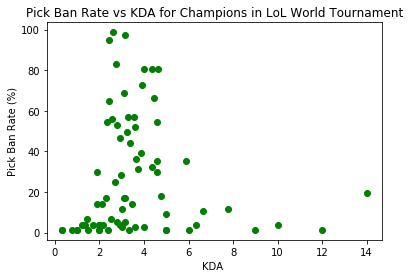

In [11]:
champs['PB'] = champs['PB'].astype('float')
champs['Winrate'] = champs['Winrate'].astype('float')
champs['Kill_Participation'] = champs['Kill Participation'].astype('float')
champs['Gold_Share'] = champs['Gold Share'].astype('float')
champs['Kill_Share'] = champs['Kill Share'].astype('float')
champs['KDA'] = champs['KDA'].astype('float')
champs['CSPM'] = champs['CSPM'].astype('float')
champs['GPM'] = champs['GPM'].astype('float')
model = sm.ols(formula='PB ~ KDA', data =champs).fit()
display("P Value from T-test for KDA:",model.t_test('KDA = 0').pvalue)

plt.title("Pick Ban Rate vs KDA for Champions in LoL World Tournament")
plt.xlabel("KDA ")
plt.ylabel("Pick Ban Rate (%)")
plt.plot(champs['KDA'],champs['PB'],'go')

Surprisingly, our T test showed that KDA is not linearly related to Ban Rate, since our P value of 0.83 is not less than our threshold of 0.05. The chart also doesn't show any sort of linear relationship. This means the players don't consider a champions KDA when picking to ban them. 

Let's try analyzing another kill related statistic in Kill Participation. A high kill participation (calculated as $\frac{Champion Kills}{Total Team Kills}$) indicates a player had a lot of his team kills, and thus had a large impact on the game. Players should be more likely to ban high impact champions so this should be linearly related to ban rate.

'P Value from T-test for Kill Participation:'

array(0.74472394)

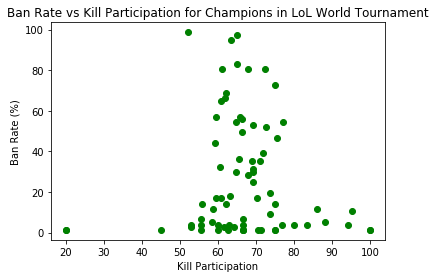

In [12]:
model = sm.ols(formula='PB ~ Kill_Participation', data = champs).fit()
display("P Value from T-test for Kill Participation:",model.t_test('Kill_Participation = 0').pvalue)

plt.title("Ban Rate vs Kill Participation for Champions in LoL World Tournament")
plt.xlabel("Kill Participation")
plt.ylabel("Ban Rate (%)")
plt.plot(champs['Kill_Participation'],champs['PB'],'go')

Surprisingly that's not related to ban rate either as we can see from the chart and high p-value, so it seems like players don't consider a champions potential to have a large amount of kills or assists at all when banning champions. 

Lets analyze some of the other key statistics in our data, like CSPM (number of minions killed per minute) and Gold per Minute, as we expect these also are likely to be related to ban rate since they indicate how quickly a champion can accumulate gold and minion kills.

'P Value from T-test for CSPM:'

array(0.42535271)

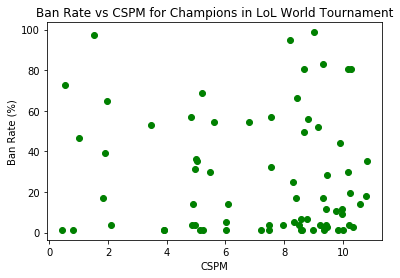

In [13]:
model = sm.ols(formula='PB ~ CSPM', data = champs).fit()
display("P Value from T-test for CSPM:",model.t_test('CSPM = 0').pvalue)

plt.title("Ban Rate vs CSPM for Champions in LoL World Tournament")
plt.xlabel("CSPM")
plt.ylabel("Ban Rate (%)")
plt.plot(champs['CSPM'],champs['PB'],'go')

Intercept    31.959159
GPM          -0.013965
dtype: float64

'P Value from T-test for GPM:'

array(0.77087128)

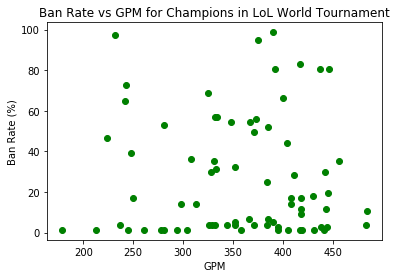

In [14]:
model = sm.ols(formula='PB ~ GPM', data = champs).fit()
display(model.params)
display("P Value from T-test for GPM:",model.t_test('GPM = 0').pvalue)

plt.title("Ban Rate vs GPM for Champions in LoL World Tournament")
plt.xlabel("GPM")
plt.ylabel("Ban Rate (%)")
plt.plot(champs['GPM'],champs['PB'],'go')

Neither CSPM nor GPM were linearly related to ban rate, as indicated by their high p values and the shape of their plots when compared to ban rate. This indicates that players don't consider champions ability to farm gold when choosing who to ban. 

Now that we have exhausted most of the variables we thought were linearly related to ban rate, let's try analyzing the win rate of champions and see if that is linearly related to ban rate.

'P Value from T-test for GPM:'

array(0.02955141)

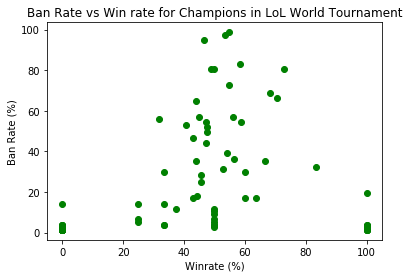

In [15]:
model = sm.ols(formula='PB ~ Winrate', data = champs).fit()
display("P Value from T-test for GPM:",model.t_test('Winrate = 0').pvalue)

plt.title("Ban Rate vs Win rate for Champions in LoL World Tournament")
plt.xlabel("Winrate (%)")
plt.ylabel("Ban Rate (%)")
plt.plot(champs['Winrate'],champs['PB'],'go')

Finally something that is related to ban rate! It seems players choose to ban champions based on how often players with those champions win.

Let's explore this relationship a little more. We can get the coefficients from our model and generate some predicted values for a champions ban-rate given their win rate.

Intercept    16.181643
Winrate       0.245335
dtype: float64

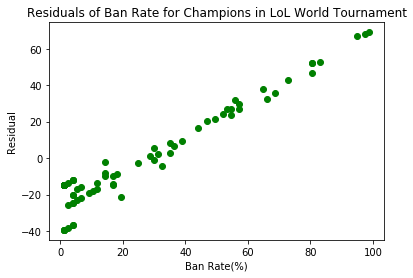

In [16]:
display(model.params)

champs['predicted_ban_rate'] = champs['Winrate'] * .245335 + 16.181643
champs['residuals_ban_rate'] = champs['PB'] - champs['predicted_ban_rate']

plt.title("Residuals of Ban Rate for Champions in LoL World Tournament")
plt.xlabel("Ban Rate(%)")
plt.ylabel("Residual")
plt.plot(champs['PB'],champs['residuals_ban_rate'],'go')

Obviously our residual plot raises a lot of concerns. A residual plot is supposed to be randomly distributed around 0, but ours is a line that increases as ban rate increases. Unfortunately, since all the other important variables were shown to be non-related with ban rate, we can't include any other variables to fix this. It seems like it is very difficult to predict what kinds of champions are banned. 

However, we can still see if we can predict winning percentage based on champion statistics. We will start by analyzing the relationship between winning percentage and KDA. It is reasonable to assume that a champion with a high winning percentage would have a high KDA, so let's test that theory.

'P Value from T-test:'

array(3.03152389e-09)

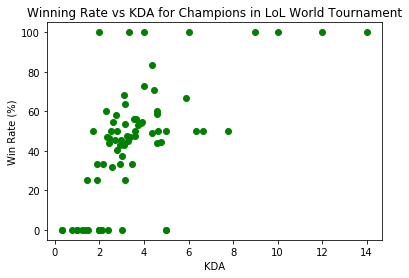

In [17]:
model = sm.ols(formula='Winrate ~ KDA', data = champs).fit()
display("P Value from T-test:",model.t_test('KDA = 0').pvalue)

plt.title("Winning Rate vs KDA for Champions in LoL World Tournament")
plt.xlabel("KDA")
plt.ylabel("Win Rate (%)")
plt.plot(champs['KDA'],champs['Winrate'],'go')

It appears winning rate is linear related to KDA for League of Legends champions. This means a champion with a high KDA will win more games on average, which makes sense. Now let's examine the gold based statistics like CSPM and GPM.

'P Value from T-test:'

array(0.22898347)

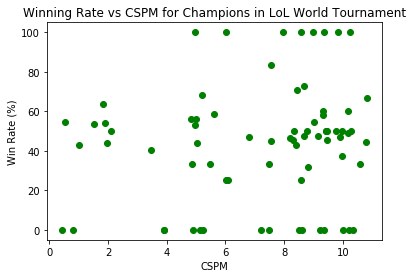

In [18]:
model = sm.ols(formula='Winrate ~ CSPM', data = champs).fit()
display("P Value from T-test:",model.t_test('CSPM = 0').pvalue)

plt.title("Winning Rate vs CSPM for Champions in LoL World Tournament")
plt.xlabel("CSPM")
plt.ylabel("Win Rate (%)")
plt.plot(champs['CSPM'],champs['Winrate'],'go')

'P Value from T-test:'

array(0.00135858)

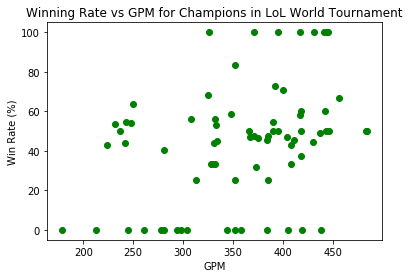

In [19]:
model = sm.ols(formula='Winrate ~ GPM', data = champs).fit()
display("P Value from T-test:",model.t_test('GPM = 0').pvalue)

plt.title("Winning Rate vs GPM for Champions in LoL World Tournament")
plt.xlabel("GPM")
plt.ylabel("Win Rate (%)")
plt.plot(champs['GPM'],champs['Winrate'],'go')

While CSPM doesn't seem to be linearly related to win rate, as indicated by the high p-value, we can see that GPM does seem to be linearly related which makes sense since more gold leads to better gear which can lead to more kills.

One reason CSPM might not be linearly related to win rate is some champions are supposed to have a low CSPM, like support champions, since they want their AD to take all of the CS. This would lead to good support champions having a low CSPM, but a high win rate. 

Since win rate is linearly related to KDA and GPM, let's create a model with both variables in it.

In [20]:
model = sm.ols(formula='Winrate ~ GPM+   KDA', data = champs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Winrate   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     23.20
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.77e-08
Time:                        13:33:13   Log-Likelihood:                -336.91
No. Observations:                  74   AIC:                             679.8
Df Residuals:                      71   BIC:                             686.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7508     14.338      0.262      0.794     -24.839      32.340
GPM            0.0391      0.044      0.894      0.374      -0.048       0.126
KDA            7.2517      1.309      5.541      0.000       4.642       9.861
==============================================================================
Omnibus:                        1.677   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.031
Skew:                           0.122   Prob(JB):                        0.597
Kurtosis:                       3.524   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unfortunately, it seems GPM is not significant in predicting winning percentage when it is included in a model with KDA, despite it being individually significant in predicted winning percentage. We will simply not use GPM as a predictor in our model due to this, leaving KDA as our only predictor.

Let's get the coefficients for the model with KDA as the only predictor and generate the predicted winning percentages and residuals.

Intercept    15.771156
KDA           7.801409
dtype: float64

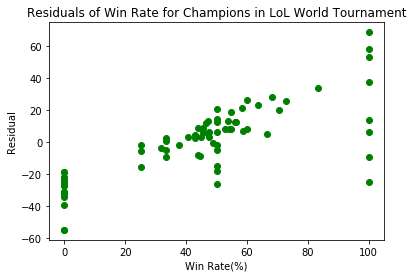

In [21]:
model = sm.ols(formula='Winrate ~ KDA', data = champs).fit()
display(model.params)

champs['predicted_win_rate'] = champs['KDA'] * 7.801409 + 15.771156
champs['residuals_win_rate'] = champs['Winrate'] - champs['predicted_win_rate']

plt.title("Residuals of Win Rate for Champions in LoL World Tournament")
plt.xlabel("Win Rate(%)")
plt.ylabel("Residual")
plt.plot(champs['Winrate'],champs['residuals_win_rate'],'go')

Unfortunately we see the same problems with our residual plot as we did with our ban rate residual plot, it is not randomly distributed around 0 and looks like a increasing diagonal line. It seems champion statistics aren't that relevant in win rate, so win rate is probably more related to things like team-composition, strategies, and skill level. While this is dissapointing, it speaks to how League of Legends has a lot of champions that can help win games and how there aren't a lot of "overpowered" champions that ruin the competitive scene

Let's move to analyzing more team related statistics with the Summer season data to see if we can predict wins and generate more insights about gameplay using that data.

<h3>Analyzing Summer Season Data</h3>

Let's continue our linear regression to develop our heuristic to predict the winner of Worlds using Summer Season Data instead. Since Summer season data has more team related statistics, it might be more helpful in predicting wins. The first bit of linear regression we want to do is determine what makes a player good.To do this, we will be using winrate as our y value, and all of the different player statistics as our x variables. The results will tell us which of the different variables are important and how important each one is individually. 

First, we separated all of the data into their own positions, because what makes a mid laner good is probably different from
what makes a support good.

In [22]:
# Create tables based on player position for our model.
top = masterReg[masterReg['Position']=='Top']
jg = masterReg[masterReg['Position']=='JG']
mid = masterReg[masterReg['Position']=='Mid']
adc = masterReg[masterReg['Position']=='ADC']
supp = masterReg[masterReg['Position']=='Supp']

top.head()

,Team,Player,Games,Wins,Losses,Winrate,Kills,Deaths,Assists,KDA,CS,CSPM,Gold,GPM,Kill Participation,Kill Share,Gold Share,Champions Played,Position
4,JD_Gaming,Zoom,50,30,20,60.0,2.60,2.00,5.56,4.08,299.90,9.00,13.72,412,63.7,20.3,22.7,12,Top
7,We,957,48,19,29,39.6,1.54,2.23,4.60,2.76,292.10,8.28,12.74,361,57.8,14.5,20.5,15,Top
8,Bilibili_Gaming,AmazingJ,48,18,30,37.5,1.48,2.98,5.08,2.20,280.65,8.48,12.32,372,65.2,14.7,21.3,13,Top
14,Snake_Esports,Flandre,47,20,27,42.6,2.21,2.36,4.83,2.98,326.64,9.69,13.54,401,67.8,21.3,22.9,18,Top
22,FunPlus_Phoenix,GimGoon,46,20,26,43.5,1.96,2.20,4.57,2.97,287.72,8.36,13.01,378,55.5,16.6,21.4,14,Top


Next, we have to determine which variables we should be using to figure out their weights, or coefficients. To do this, we
created a powerset function that returns every possible combination of the variables we can have.

In [23]:
# The code for this function was taken from:
#     https://codereview.stackexchange.com/questions/178225/computing-the-powerset-of-a-list

# Powerset function of a given list
def gen_powerset(l):
    if not l:  # List is empty
        yield []
        return
    for sub_powerset in gen_powerset(l[1:]): # Generate next list
        yield sub_powerset
        yield [l[0]] + sub_powerset

Next, we removed outliers from the data that would significantly impact the results. This is due to us using winrate as our
measure of how good a player is. For example, if we have a substitute player that only played one game, and won, our algorithm
thinks that he is the best player in the world. To remove outliers, we tested each dataset with at least 'x' games played
by players to see what the cutoff should be. We don't want to remove more than 10 games, because that would encrouch on the
regular season starters for some regions, so we looked at 0-10 for each region.

The code below is linear regression for predicitive analysis. Here we provide some links to extra reading material to familarize yourself with linear regression and how it is used, to understand the next part of our tutorial. 

A [Source](https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6) on what linear regression is and why we use it. 
  
An [Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) of basic linear regression

A [Source](https://datatofish.com/multiple-linear-regression-python/) on linear regression of multi-variables, which is the type we did

A [Source](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) to understand the purpose and basic use of test and training data

In [24]:
# This is an example of how we determined the cutoffs for each position. This was done on the adc table.

# Must have played at least 0-10 games.
for u in range(0,10):
    
    # Must have played at least 'u' games
    tmp = adc[adc['Games'] >= u]

    best = -1    # Keeps track of the best variance
    bestLs = []  # Holds the list of variables for the best variance
    coef = []    # Contains the coefficients for the variables
    
    # Set winrate to be our ranking for the players
    y = tmp['Winrate']
    
    # All of the variables we want to look at.
    # We excluded 'Champions Played' because we thought it wouldn't have a significant impact and any correlation
    # the regression would pick up on would be for the wrong reason. This is because the more games you've played,
    # the more champions you've played, on average, and this leads to a correlation we don't want to look at.
    vars = ['KDA', 'GPM', 'Kill Share', 'Kill Participation', 'Kills', 'Deaths', 'Assists','Gold', 'Gold Share', 'CS', 'CSPM']

    # Look at every possible combination of variables for the players
    for ps in gen_powerset(vars):
        
        if ps: # Dont include empty list
            
            X = tmp[ps]
            
            # Split data into test and training sets with an 80/20 split, which is standard to minimize overfitting.
            # 80% of the data is used for training and the remaining 20% is used for testing.
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
            
            # Fit the model to the training data
            regr = linear_model.LinearRegression()
            regr.fit(X_train, y_train)

            #numpy array that contains all the predicted values for the input values in the X series.
            y_pred = regr.predict(X_test)

            # Get the variance score between the test data and our prediction. 1 would be a perfect score.
            residuals = r2_score(y_test, y_pred)

            # Keep track of the best score and which variables we used.
            if residuals > best:
                best = residuals
                bestLs = ps
                coef = regr.coef_
                
    print("Accuracy for predicting wins after excluding players with less than", str(u),"games:",str(round(best * 100,2)) + "%")

Accuracy for predicting wins after excluding players with less than 0 games: 89.4%
Accuracy for predicting wins after excluding players with less than 1 games: 89.4%
Accuracy for predicting wins after excluding players with less than 2 games: 87.56%
Accuracy for predicting wins after excluding players with less than 3 games: 84.77%
Accuracy for predicting wins after excluding players with less than 4 games: 90.46%
Accuracy for predicting wins after excluding players with less than 5 games: 81.57%
Accuracy for predicting wins after excluding players with less than 6 games: 93.33%
Accuracy for predicting wins after excluding players with less than 7 games: 93.33%
Accuracy for predicting wins after excluding players with less than 8 games: 92.75%
Accuracy for predicting wins after excluding players with less than 9 games: 91.14%


From this output, we see that if we look at just players that have played at least 6 games our variance goes all the way
up to a 93% accuracy. If we used every player, so at least 0 games played, we would have an 89% accuracy. In the end, this
should help our model be more consistent by removing outliers in the data. We're allowed to do this because it makes sense 
heuristically, and we still have a sizeable portion of the regular data. This removes the problem of having a person that
went 1/1 in their games and our algorithm tries to use them as the best player.

By having 10 be our max we want to cut out, it ensures that we keep starters for each region, as well as players that split
time like the junglers for Cloud9, Svenskeren and Blaber. The only players we remove are substitutes.

Now to ensure that us removing the outliars hasn't had a significant effect on the amount of data we use, let's check to see how much of our data we are still using

In [25]:
round(len(adc[adc['Games']>=6])/len(adc),3)

0.867

We see that we are still using 86.7% of the data which is good to see.

We repeated this process for each position and came up with the following numbers for minimum games played:

Top - 7<br>
Jungle - 2<br>
Mid - 4<br>
AD Carry - 6<br>
Support - 7<br>

Now we can remove the outliers (people with less than the minimum amount of games players) from our position tables.

In [26]:
top = top[top['Games']>=7]
jg = jg[jg['Games']>=2]
mid = mid[mid['Games']>=4]
adc = adc[adc['Games']>=6]
supp = supp[supp['Games']>=7]

# Update the masterReg table
newList = [top,jg,mid,adc,supp]
masterReg = pd.concat(newList).sort_values(['Games','Player'],ascending=[False,True]).reset_index().drop('index',axis=1)

The next step is to look at each position and figure out which variables we want to use now that we removed our outliers. using linear regression, we utilize the powerset created above to run through every combination of variables and see which generates the closet fit for our model and therefore the best prediction. The next few blaocks run through the code to predict what makes a player in a certain position do well. We show the code for the position 'top' but by changing th position passed in, we generated results for all positions (not shown). 

In [27]:
# TOP MODEL
# Look at the top 20 results
numResults = 20

# Must have played at least 7 games
tmp = top[top['Games'] >= 7] #change this to whatever position you would like to view statistics for that position

# All of the variables we want to look at.
vars = ['KDA', 'GPM', 'Kill Share', 'Kill Participation', 'Kills', 'Deaths', 'Assists','Gold', 'Gold Share', 'CS', 'CSPM']

best = [-1]*numResults   # Array of top 20 variance scores
bestLs = [-1]*numResults # Array of corresponding variables to each of the variance scores
coef = [[-1]]*numResults # Array of weights associated with each of the variables producing the variance scores

y = tmp['Winrate']

for ps in gen_powerset(vars):
    if ps:
        X = tmp[ps]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        regr = linear_model.LinearRegression()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        residuals = r2_score(y_test, y_pred)

        # Compares and tracks the best variances
        for x in range(0,len(best)):

            if residuals > best[x]:
                best[x] = residuals
                bestLs[x] = ps
                coef[x] = regr.coef_
                break

The linear regression gives us the top 20 variance scores. 1 would be a perfect prediction, so having a value in the 80th or 90th percentile is a good prediction. For top, the variance is between 90 and 94 percent.

In [28]:
# This will show us the variance score, what variables it included and what the weights are for them.
for x in range(0,5):
    print("Var: " + str(best[x])) # Print variance
    for y in range(0,len(coef[x])):
        print(bestLs[x][y] + ": " + str(coef[x][y])) # Print column value and it's weight
        
    print()

Var: 0.9409194865667102
Kill Participation: 0.41870030190320784
Kills: -5.167853590358203
Gold: 33.72320651234464
Gold Share: -16.924380441064116
CS: -1.3655675442896547
CSPM: 39.027813961885265

Var: 0.9407408000926424
GPM: 0.30315716157530537
Kill Participation: 0.4571507493067729
Kills: -5.110816971258835
Gold: 24.185325702232806
Gold Share: -16.875302658198155
CS: -0.9432834250077977
CSPM: 25.454715131610595

Var: 0.9351921762809089
Kills: -6.137537530047679
Gold: 36.26738871884242
Gold Share: -15.690385451927254
CS: -1.4357446914972982
CSPM: 37.91785698458777

Var: 0.9347049812382993
GPM: -0.10315729985001472
Kills: -6.126644514963078
Gold: 39.433404662646836
Gold Share: -15.745646063409273
CS: -1.577245176010293
CSPM: 42.5711500043634

Var: 0.9333757848390294
KDA: 1.8162022549812264
Kill Participation: 0.3256399723294834
Kills: -5.520494607656059
Gold: 31.534933434541003
Gold Share: -14.6649990835399
CS: -1.2878069492209019
CSPM: 35.60175791392126



Since the difference in the variances of the top 20 are so small, we decided to go ahead and pick the one that makes the most sense using previous knowledge involving League of Legends. For those unfamilar with league, we have listed the main thing we looked for that helped us pick the heuristic below. Doing this saves us from picking just the top heuristic that may have been the best on our particular data set because of skewed input.

These are the results we came up with for each position.

Top<br>
Var: 0.931<br>
KDA: 2.098<br>
GPM: 0.593<br>
Kill Participation: 0.386<br>
Kills: -5.463<br>
Gold: 12.532<br>
Gold Share: -14.218<br>
CS: -0.449<br>
CSPM: 8.511<br>

For a top laner, it looks like you shouldn't be focusing on kills to let your team get them instead, but KDA is also positive
so that encourages you to have more assists. Gold is important, which makes sense because gold is used to buy items, which 
makes you stronger. However, we see that Gold Share is fairly negative, meaning you should be getting gold, but not at the 
expense of your team's gold.

Jungle<br>
Var: 0.934<br>
KDA: 0.181<br>
GPM: 0.735<br>
Kills: -2.680<br>
Deaths: -7.255<br>
Assists: 1.857<br>
Gold: 7.166<br>
Gold Share: -14.197<br>
CS: -0.385<br>
CSPM: 10.493<br>

Jungle follows roughly the same logic as top: you want assists, not kills, and you don't want to take a large portion of the
team's gold.

Mid<br>
Var: 0.901<br>
GPM: 0.071<br>
Deaths: -13.025<br>
Assists: 3.69342852617<br>
Gold: 19.8616597461<br>
CS: -0.845745453945<br>
CSPM: 12.7679155894<br>

The algorithm seems to place a lot of weight on Gold Share and have it be negative, which doesn't really make sense for a mid
laner, because you normally want them to have a high percentage of the team's gold. This is probably due to the fact that Gold Share, no matter of the position, is always going to be around 20% because it's split between 5 people.

Because we didn't think Gold Share would be a good predictor, we excluded it from our results and looked for a different model. This
is what we came up with, which still works pretty well. It has a focus on Gold, CSPM, and assists, while also punishing deaths.

ADC<br>
Var: 0.933<br>
KDA: 0.879<br>
GPM: 1.130<br>
Kill Share: 1.035<br>
Kill Participation: -0.335<br>
Kills: -12.969<br>
Assists: 4.652<br>
CS: 0.128<br>
CSPM: -11.299<br>
Gold Share: -12.543<br>

We ran into the same issue with Gold Share when doing the adc data, but without Gold Share included the variance scores dropped
too low to be used. To rectify this, we just used the top result and decided not to influence the results in any way. The model
seems to think that kills, gold share, kill participation, and cspm are all negative, which is counter-intuitive for any
league of legends adc. Normally your job is to get kills, be involved, and get as much gold as you can so that you can carry
your team by dealing the most damage. Since this doesn't line up with our intuition, we'll see how the results are at the end
and talk more about this.

Supp<br>
Var: 0.915<br>
KDA: 0.031<br>
GPM: 1.338<br>
Kill Share: -0.145<br>
Kills: -3.991<br>
Deaths: -6.054<br>
Gold Share: -23.072<br>

For a support, kills should be negative because you don't want to be taking kills/gold away from your team. Again this follows
roughly the same pattern as top and jungle.

<h3>Predicting the Winner with Linear Regression</h3>

Now that we have generated a heuristic for each position, we will use the weights we got from our linear regression and use them to calculate a player's winrate. We will do this by using the variables and associated weights profuced by our heuristic for each position to create the calculated winrate. We are then adding this as a new column to our dataframe. These calculated winrates will be used in linear regression again to predict future winners. 

In [29]:
# add the calculated value to the the corresponding table position
top['CalculatedWinrate'] = 2.09811734882*top['KDA'] + 0.593191309816*top['GPM'] + 0.386431392477*top['Kill Participation'] + -5.46362811076*top['Kills'] + 12.5323771206*top['Gold'] + -14.2182616141*top['Gold Share'] + -0.449448292041*top['CS'] + 8.51130983888*top['CSPM']
jg['CalculatedWinrate'] = 0.181164206403*jg['KDA'] + 0.735342254784*jg['GPM'] + -2.68009575084*jg['Kills'] + -7.25541495648*jg['Deaths'] + 1.85733953438*jg['Assists'] + 7.16660335062*jg['Gold'] + -14.1978168455*jg['Gold Share'] + -0.385377553174*jg['CS'] + 10.493478078*jg['CSPM']
mid['CalculatedWinrate'] = mid['GPM']*0.0713156133641 + mid['Deaths']*-13.0255264467 + mid['Gold']*19.8616597461 + mid['CS']*-0.845745453945 + mid['CSPM']*12.7679155894 + mid['Assists']*3.69342852617
adc['CalculatedWinrate'] = 1.13044121708*adc['GPM'] + 1.03542306739*adc['Kill Share'] + -0.335817323575*adc['Kill Participation'] + -12.9697993181*adc['Kills'] + 4.65262777296*adc['Assists'] + 0.128173966315*adc['CS'] + -11.2995505544*adc['CSPM'] + -12.5435852695*adc['Gold Share']
supp['CalculatedWinrate'] = 1.338934096*supp['GPM'] + -0.145858503846*supp['Kill Share'] + -3.99163808505*supp['Kills'] + -6.05433184202*supp['Deaths'] + -23.0728233467*supp['Gold Share']

Now, we can use linear regression to predict games. First we need to calculate the difference in the calculated winrate
for each position and save them as variables. We will do this for each game. These will be the independent variables for our ML and the dependent variable will be which team won, a value either 0 or 100. 

In [30]:
teams = {}                # Dictionary ('Team' -> [topDiff, jgDiff,...])
laneDifferential = [[],[],[],[],[]]   # Contains new columns to be added to masterMatch

# Go through each game we have data saved for.
for index,row in masterMatch.iterrows():
    
    team0 = [] # Team 0 data
    team1 = [] # Team 1 data
    
    # If we haven't seen this team yet, add it to the dictionary
    if not row['Team 0'] in teams:
        tmp = []
        tmp.append(top[top['Team']==row['Team 0']])
        tmp.append(jg[jg['Team']==row['Team 0']])
        tmp.append(mid[mid['Team']==row['Team 0']])
        tmp.append(adc[adc['Team']==row['Team 0']])
        tmp.append(supp[supp['Team']==row['Team 0']])
        
        for player in tmp: 
            if len(player) == 1: # If there's only 1 player at that position, add them in
                team0.append(player['CalculatedWinrate'])
            else:
                team0.append(player['CalculatedWinrate'].mean())  # If there are multiple players, we take the average
                
        # Save the team data in the dictionary for use later on
        teams[row['Team 0']] = team0
        
    else:
        team0 = teams[row['Team 0']]
    
    # Repeat the process for the next team
    if not row['Team 1'] in teams:
        tmp = []
        tmp.append(top[top['Team']==row['Team 1']])
        tmp.append(jg[jg['Team']==row['Team 1']])
        tmp.append(mid[mid['Team']==row['Team 1']])
        tmp.append(adc[adc['Team']==row['Team 1']])
        tmp.append(supp[supp['Team']==row['Team 1']])
        
        for player in tmp: 
            if len(player) == 1:
                team1.append(player['CalculatedWinrate']) 
            else:
                team1.append(player['CalculatedWinrate'].mean())
                
        teams[row['Team 1']] = team1
    
    else:
        team1 = teams[row['Team 1']]
       
    # Calculate the difference for each lane
    for lane in range(0,5):
        laneDifferential[lane].append(float(team0[lane]) - float(team1[lane]))
    
# Update masterMatch with the new data
masterMatch['TopDiff'] = laneDifferential[0]
masterMatch['JGDiff'] = laneDifferential[1]
masterMatch['MidDiff'] = laneDifferential[2]
masterMatch['ADCDiff'] = laneDifferential[3]
masterMatch['SuppDiff'] = laneDifferential[4]

masterMatch.head()

,Team 0,Team 1,Winner,TopDiff,JGDiff,MidDiff,ADCDiff,SuppDiff
0,100_Thieves,Cloud9,100,-4.608962,-5.403436,-3.653408,-15.702427,-11.031176
1,100_Thieves,Cloud9,0,-4.608962,-5.403436,-3.653408,-15.702427,-11.031176
2,100_Thieves,Clutch_Gaming,100,24.092309,34.620066,31.938803,19.437228,19.151735
3,100_Thieves,Clutch_Gaming,100,24.092309,34.620066,31.938803,19.437228,19.151735
4,100_Thieves,Counter_Logic_Gaming,100,25.776966,-9.190603,14.988410,16.230351,12.307903


Now we see that positive numbers tend towards 100, while negative numbers tend towards 0, which is why we modified the table earlier on. Again, we scaled 1 up to 100 just to increase the value of our weights.

Now we can run linear regression on the masterMatch table using our calculated differences as the X, and the winner result as the y.

In [31]:
tester = masterMatch

# Calculated Differences
vars = ['TopDiff','JGDiff','MidDiff','ADCDiff','SuppDiff']

y = tester['Winner']  # Winner data

X = tester[vars]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
residuals = r2_score(y_test, y_pred)
                
print("Var: " + str(residuals))  # Print out the variance
print(regr.coef_)                # Print out each lane's importance

Var: 0.30034114356623665
[-0.12769662 -0.09652615  0.00205015  0.28178966  1.12903653]


From our results, we can see that our variance score is 30%. This isn't ideal, especially considering we were expecting at
least a value over 50%, which would be a blind guess. The model seems to think that top and jungle are negatively weighted,
meaning that teams with a worse top and jungle will win a game. This is counter-intuitive to us because normally the team
with better players wins more often. It is also worth noting that support is the largest value here by a decent margin,
implying that teams with a better support win more often. Who knows? Maybe support is the most important position. The data
seems to think so. Now we will simulate matches in Worlds to see how well the model does, despite it going against our 
intuition.

Next we will Simulate matches! Just enter 2 teams and look at the result. Negative means the team on the right will win. Positive means the team on the left will win. 

In [32]:
def matchup(team1,team2):
    teamA = teams[team1]
    teamB = teams[team2]

    # Get the data to be the right type
    for index in range(0,5):
        if isinstance(teamA[index],pd.Series):
            teamA[index] = teamA[index].values[0]
    for index in range(0,5):
        if isinstance(teamB[index],pd.Series):
            teamB[index] = teamB[index].values[0]

    t = teamA[0] - teamB[0]   # Calculate the differences
    j = teamA[1] - teamB[1]
    m = teamA[2] - teamB[2]
    a = teamA[3] - teamB[3]
    s = teamA[4] - teamB[4]

    # Calculate the results
    res = t*-0.12769662 + j*-0.09652615 + m*0.00205015 + a*0.28178966  + s*1.12903653

    if res>0:
        print("The winner is " + team1 + " by a differential of " + str(res))
        return team1
    else:
        print("The winner is " + team2 + " by a differential of " + str(res))
        return team2

Now we will simulate the group stage, by doing a round-robin of the teams in each group and ranking them by wins.
We input all of the teams in each group as a list and go through each group, storing the resulting dataframe in 'group'

These are the results for the group stage with our model.<br>

In [33]:
groupFinal = [] # Stores final results from each group
rank = {}       # Stores number of wins for each team

groupTeams = []
groupTeams.append(["Freecs", "G2_Esports", "Yoe_Flash_Wolves", "Phong_V%C5%A9_Buffalo"]) # Group A
groupTeams.append(["Royal_Never_Give_Up", "Cloud9", "Team_Vitality", "Gen.G"])           # Group B
groupTeams.append(["KTRolster", "EDward_Gaming", "Team_Liquid", "MAD_Team"])             # Group C
groupTeams.append(["Fnatic", "Invictus_Gaming", "100_Thieves", "G-Rex"])                 # Group D

for group in groupTeams:
    for x in group:
        rank[x] = 0

    group2 = list(combinations(group,2))

    for match in range(0,len(group2)):
        winner = matchup(group2[match][0],group2[match][1])
        rank[winner] = rank[winner]+1

    final = []
    for team in group:
        final.append([team,rank[team]])

    groupFinal.append(pd.DataFrame(final,columns=['Team','Wins']).sort_values('Wins',ascending=False))

The winner is G2_Esports by a differential of -7.592578526548512
The winner is Yoe_Flash_Wolves by a differential of -33.59370213223466
The winner is Phong_V%C5%A9_Buffalo by a differential of -34.09542591839573
The winner is Yoe_Flash_Wolves by a differential of -26.001123605686146
The winner is Phong_V%C5%A9_Buffalo by a differential of -26.50284739184722
The winner is Phong_V%C5%A9_Buffalo by a differential of -0.5017237861610738
The winner is Cloud9 by a differential of -5.233833257354042
The winner is Royal_Never_Give_Up by a differential of 6.2110955390017635
The winner is Royal_Never_Give_Up by a differential of 7.692084732657586
The winner is Cloud9 by a differential of 11.444928796355805
The winner is Cloud9 by a differential of 12.92591799001163
The winner is Team_Vitality by a differential of 1.4809891936558235
The winner is KTRolster by a differential of 1.0721058836192492
The winner is Team_Liquid by a differential of -6.646631205295023
The winner is MAD_Team by a differen

In [34]:
for group in groupFinal:
    print(group)
    print()

                    Team  Wins
3  Phong_V%C5%A9_Buffalo     3
2       Yoe_Flash_Wolves     2
1             G2_Esports     1
0                 Freecs     0

                  Team  Wins
1               Cloud9     3
0  Royal_Never_Give_Up     2
2        Team_Vitality     1
3                Gen.G     0

            Team  Wins
2    Team_Liquid     3
3       MAD_Team     2
0      KTRolster     1
1  EDward_Gaming     0

              Team  Wins
1  Invictus_Gaming     3
0           Fnatic     2
2      100_Thieves     1
3            G-Rex     0



GROUP A: 4,3,2,1. It predicted the teams in reverse order, which isn't ideal. <br>

GROUP B: 2,1,3,4. It got 2/4 correct, but just switched first and second place. That's really good though because the
        top 2 teams from each group move on, so it predicted those teams correctly, it just messed up on the seeding.<br>
        
GROUP C: 3,4,1,2. It was almost in reverse order, and didn't get any of the finalists correctly. <br>

GROUP D: 2,1,3,4. It did the same as group B where it only switched the top 2 teams, which is pretty good.

One reason the model might not be performing very well is that we aren't considering strength of schedule. For example, if one team does really well during the regular season because they play against bad teams, the model thinks they're better than a 
team that did decently well in a tough region. We can't add that in as a parameter because all of our data is teams playing
against each other in the same region, which would cancel out and become zero. Since we don't have any international data,
we can't do this with machine learning, so we will attempt to create our own model and incorporate it in. 

First, we need a way to tell what region a team is in.

In [35]:
# Returns a number from 0-6, of what region a team is from. These number are associated with how we store
# the teams in the reg list for each region.
def region(teamName):
    for x in range(0,6): # For each region
        if teamName in matchReg[x]['Team 0'].unique(): # If the team is in that region, return the index
            return x

Next, we need to actually rank the regions from best to worse. Region ranking has the highest being the best.  <br>
Our model from best to worst region: LPL, LCK, EU, LMS, NA, VCS.<br>
This ranking is purely heuristic, and will only impact the data by a small amount. At most, it will change a result by 5
points. The results we've calculated range anywhere from 1 to 30, so it should have an impact, but not a large one. By doing
this, it will only impact matches that are really close and hopefully push them over the edge in our favor.

In [36]:
regRank = {}    
regRank[0] = 2 # NA is 5th
regRank[1] = 4 # LMS is 4th
regRank[2] = 6 # LPL is 1st
regRank[3] = 5 # LCK is 2nd
regRank[4] = 3 # EU is 3rd
regRank[5] = 1 # VCS is 6th

To incorporate strength of schedule into the final ranking, we will create a new matchup function that incorporates this.

In [37]:
def matchup2(team1,team2):
    teamA = teams[team1]
    teamB = teams[team2]

    # Get the data to be the right type
    for index in range(0,5):
        if isinstance(teamA[index],pd.Series):
            teamA[index] = teamA[index].values[0]
    for index in range(0,5):
        if isinstance(teamB[index],pd.Series):
            teamB[index] = teamB[index].values[0]

    t = teamA[0] - teamB[0]   # Calculate the differences
    j = teamA[1] - teamB[1]
    m = teamA[2] - teamB[2]
    a = teamA[3] - teamB[3]
    s = teamA[4] - teamB[4]
    r = regRank[region(team1)] - regRank[region(team2)]  # Region difference

    # Calculate the results
    res = t*-0.12769662 + j*-0.09652615 + m*0.00205015 + a*0.28178966  + s*1.12903653 + r

    if res>0:
        print("The winner is " + team1 + " by a differential of " + str(res))
        return team1
    else:
        print("The winner is " + team2 + " by a differential of " + str(res))
        return team2

When we add in the regional difference, our results change for the group stage by a little.<br>
In group A, it now ranks them 3,4,2,1 instead of 4,3,2,1. So it's a little better, but not by much.<br>
In group C, it now ranks them 3,1,2,4 instead of 3,4,1,2. So again it's a little better.<br>

If we had more time we would definitely look into grabbing some international data to train the model on regional difference
and add that in as a factor, because it would make the model slightly better.

Now that we finished the group stage, we will look at the elimination bracket given the starting teams in the bracket and try to predict wins using our new model with strength of schedule included. The first round bracket looks like this:

In [38]:
# Africa Freecs --
#                  >---Winner---
# Cloud 9 --------             
                         
# Fnatic ---------                                  
#                 >---Winner---                      
# EDG ------------                                   
                                         
# KT Rolster -----                                   
#                  >---Winner---                      
#  Invictus Gaming-                                  
                              
# Royal Never G.--             
#                  >----Winner---
# G2 Esports -----


# These are the results our model gives:

In [39]:
display(matchup2('Freecs', 'Cloud9'))
display(matchup2("Fnatic","EDward_Gaming"))
display(matchup2("Invictus_Gaming", "KTRolster"))
display(matchup2("Royal_Never_Give_Up","G2_Esports"))

The winner is Cloud9 by a differential of -13.904398976723545


'Cloud9'

The winner is Fnatic by a differential of 3.5574904599936072


'Fnatic'

The winner is Invictus_Gaming by a differential of 29.718394237571736


'Invictus_Gaming'

The winner is Royal_Never_Give_Up by a differential of 6.077987192820992


'Royal_Never_Give_Up'

Our model predicts all of the first round winners correctly, except for RNG vs. G2. This match was an upset, with G2 coming
out on top, and a lot of people had RNG winning the entire tournament. So it's reasonable that our code got it wrong, however,
despite that it only had RNG winning by a margin of 6, which is pretty close considering some of the other margins we have
between were in the 13-30 range.

Now lets move onto the second round bracket. Our second round bracket (which incorrectly includes RNG instead of G2 who won in real life) looks like this:

In [40]:
# Africa Freecs --
#                  >---Cloud 9---
# Cloud 9 --------               ----------
#                                          >---Winner
# Fnatic ---------             ------------                     
#                 >---Fnatic---                      
# EDG ------------                                   
                                         
# KT Rolster -----                                   
#                  >---Invictus Gaming---                      
#  Invictus Gaming-                     ---             
#                                          >---Winner---
# Royal Never G.--                      ---
#                  >--- Royal Never G.---
# G2 Esports -----

# These are the results our model gives:

In [41]:
display(matchup2("Cloud9","Fnatic"))
display(matchup2("Invictus_Gaming","Royal_Never_Give_Up"))

The winner is Cloud9 by a differential of 8.230398762695497


'Cloud9'

The winner is Invictus_Gaming by a differential of 19.23644415585592


'Invictus_Gaming'

In the semifinals, we predicted Cloud9 to beat Fnatic, which was incorrect, and we predicted Invictus to move on, which was
correct. However, it is important to note our model had Cloud9 winning by only 8.23 which is relatively low compared to other margins of victory

Now let's predict the final matchup between Cloud9 and Invictus Gaming.

In [42]:
display(matchup2("Cloud9", "Invictus_Gaming"))

The winner is Invictus_Gaming by a differential of -18.002610898501878


'Invictus_Gaming'

In the final match, we predicted Invictus Gaming to win, which was correct. 

Just for fun, we will also run the actual final matchup, which was Fnatic vs. Invictus Gaming, just to see what our model would have predicted.

In [43]:
display(matchup2("Fnatic", "Invictus_Gaming"))

The winner is Invictus_Gaming by a differential of -26.233009661197375


'Invictus_Gaming'

The model's result was Invictus Gaming winning with a margin of 26. 26 is a pretty big
margin compared to some of the numbers we've been getting, and that makes sense because they won 3-0 in a best of 5 series.

So given the result's of the group stage that we previously generated, let's see what the results would have been if those were the teams placed in the elimination stage.

We will save going round by round, since there are no actual results to compare this to, and just output the final bracket from our results. If you would like to check these results or try a hypothetical matchup between two teams, please feel free to use our matchup2 function to do so like we have done throughout our analysis.

In [44]:
# Flash Wolves ---
#     18.9        >---Flash W---
# Royal Never G.--             >
#                      .3      >---Invictus Gaming---
# Invictus Gaming-             >                     >
#     29.7        >---Inv. G---                      >
# KT Rolster -----                                   >
#                                       1.8          >---Invictus Gaming
# Team Liquid ----                                   >
#     .16         >---Liquid---                      >
# Fnatic ---------             >                     >
#                      24.2    >-----PV Buffalo------
# Cloud 9 --------             >
#     16.2        >-PV Buffalo-
# PV Buffalo -----

So as we can see, Invictus Gaming still would have won in our model's predicted elimination bracket, which is good to see as it means our model is accurate in the long term as model's have more predictions in them.

If we don't use the strength of schedule metric, then Flash Wolves would've won over Invictus Gaming, and 
Phong Vu Buffalo would've beaten Invictus Gaming in the final. It is also worth noting that with the strength of schedule
metric, Fnatic almost beat Team Liquid; only losing by .16 instead of 2.16.

<h1><center>Conclusion and Followup</center></h1>

Overall, our model did pretty well considering the small amount of data we added in, using just the most recent summer-season data. We could have expanded this and included data from every region, not just the ones that made it to worlds, and we could have added data from the spring split for those regions. 

We also saw the importance of a strength of schedule metric that ended up being the deciding factor for some
close games. We did a very simple metric of just ranking regions 1-6 and taking the difference. This could've been done with
regression to figure out the weights for the difference to see how important it is, and we could've done some ML to
determine the rankings of each region, rather than doing it heuristically.

With all of these factors in mind, it's pretty impressive that the model worked as well as it did. We only looked at player data, and for each player we only used a portion of their stats that the model told us to use. For some of the positions, ADC especially, these results were very counter intuitive, like having kills and gold share be negatively weighed. Despite this, we trusted the model and went ahead with the calculations and still predicted the winner of worlds correctly, even when we used our results from the group-stage that
weren't very good. 

Therefore, we can see our conclusions that top-laners and junglers should value assists and gold more than kills have some validity as those statistics were the reason we were able to predict the results of worlds at a relatively high accuracy. There is also reason to conclude that ADC's and Mids should play a more cautious game since our model highlighted that their death amount should be very low. This could be because ADC's and Mids are two of the most important positions in the game and when they are dead they are not able to impact the game or generate any gold to help bolster their equipment.

Going forward, this model could easily be updated with new data to make it more accurate. For example, after the group stage you could add that player data to your existing data and be able to better predict the eliminiation round. It would also be wise to find a cohesive source of player position data to save from hardcoding in the positions as teams change players. 

Another popular metric people use is having the data be weighed chronologically, where more recent
data is more important than older data. In theory, you would be able provide a weight that says how important a dataframe row is in your heuristic. Features such as decay parameter limits older data into having a lesser effect on the training in machine learning. Doing this would also potentially improve the accuracy of our model. 

League of Legends remians one of the most played online games, with [fantasy leagues](https://fantasy.na.lolesports.com/en-US) and large public interest in game predictions. However, bot training and game prediction has been up-and-coming more and more recently. This may be due to machine learning becoming a more popular area in schools among the major demographic of the games. Whatever the reason, we believe this data is something both interesting and resourceful to those playing or interested in the game. We were able to accomplish a lot using the knowledge from our semester in 320 to tidy, manipulate, train, and analyze our data. More than just providing data for league learning, our process through data science is applicable to other games for independent analysis by any reader. We hope this tutorial has sparked an interest in and provided a foundation for your journey in data science!

For some other cool projects about league, check out the following links on [using AI to improve decision making in league](https://towardsdatascience.com/ai-in-video-games-improving-decision-making-in-league-of-legends-using-real-match-statistics-and-29ebc149b0d0), and [analyzing league with machine learning.](https://data-speaks.luca-d3.com/2017/05/machine-learning-to-analyze-league-of.html) 